In [184]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rc
rc('text', usetex=True)
plt.style.use('ggplot')
plt.rcParams.update({'axes.labelsize':16})
plt.rcParams.update({'axes.titlesize':16})
plt.rcParams.update({'legend.fontsize':16})
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['lines.linewidth'] = 4
import pandas as pd
from sklearn.mixture import GaussianMixture
import os
from scipy.stats import norm, multivariate_normal, gamma, invgamma
from tqdm import tqdm

In [185]:
n = 500
rho = .75
y = np.ones(n)
for it in range(n - 1):
    y[it + 1] = rho * y[it] + norm(0, 1).rvs()

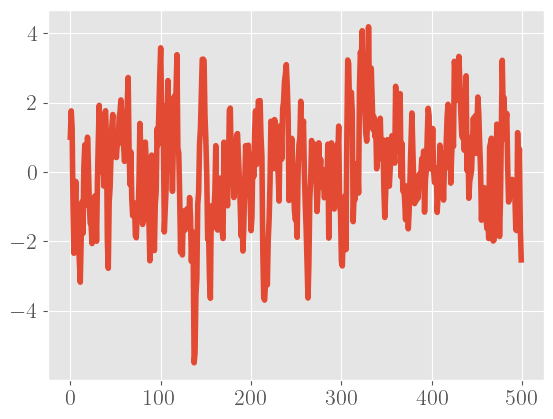

In [186]:
plt.plot(y)

In [187]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(fit_intercept=False).fit(X.reshape(-1, 1), Y)
lr.coef_

np.var(Y - lr.coef_ * X)

0.9470404897105469

In [188]:
X = y[1:]
Y = y[: -1]

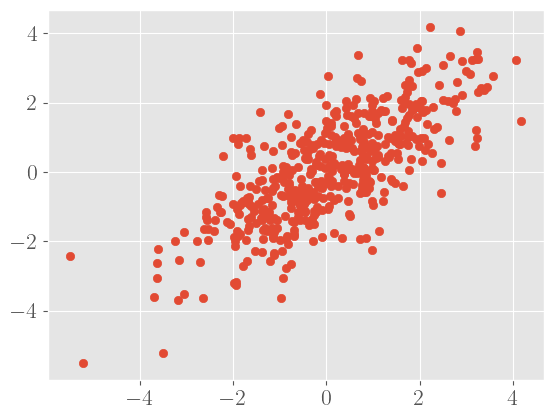

In [189]:
plt.scatter(X, Y)

In [190]:
class GibbsSampler:
    def __init__(self, Y, X, a, b, n_iter=5000):
        self.X = X
        self.Y = Y
        self.a = a
        self.b = b
        self.n_iter = n_iter
        self.n_points = len(Y)
        self.sig_sq_traces = np.ones(n_iter)
        self.rho_traces = np.ones(n_iter)
        
    def _update_rho(self, sig_sq):
        rho = norm.rvs(loc=np.sum(self.Y * self.X) / np.sum(self.X**2), scale=np.sqrt(sig_sq/np.sum(self.X**2)))
        return rho
    
    def _update_sig_sq(self, rho):
        beta = 0.5*np.sum((self.Y - rho*self.X)**2) + self.b
        sig = 1/gamma.rvs(a=self.a + self.n_points/2, scale=1/beta)
        return sig
    
    def fit(self):
        for it in tqdm(range(self.n_iter - 1)):
            self.rho_traces[it + 1] = self._update_rho(self.sig_sq_traces[it])
            self.sig_sq_traces[it + 1] = self._update_sig_sq(self.rho_traces[it + 1])
        return self.rho_traces[500:][::2], self.sig_sq_traces[500:][::2]
            
        
        
gs = GibbsSampler(Y, X, .5, .5)       
rho, sig = gs.fit()      

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4999/4999 [00:00<00:00, 12601.33it/s]


[0.69796583 0.79771816]


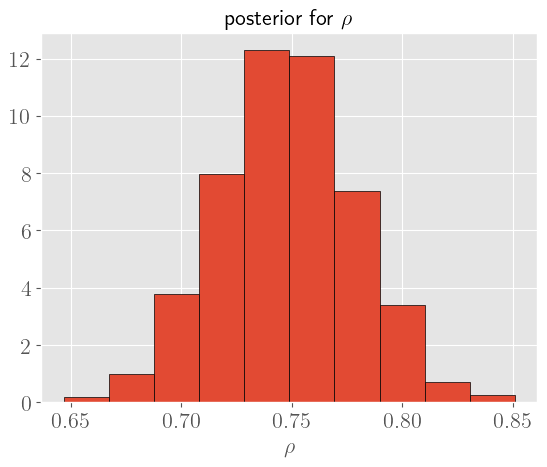

In [191]:
plt.hist(rho, edgecolor='black', density=True)
plt.title(r'posterior for $\rho$')
plt.xlabel(r'$\rho$')
print(np.quantile(rho, [.05, 1-.05]))
plt.savefig('rho.png', dpi=300, bbox_inches='tight')

[0.89953498 1.1041579 ]


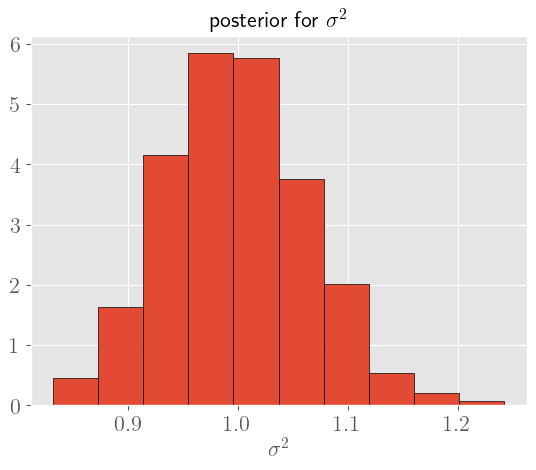

In [192]:
plt.hist(sig, edgecolor='black', density=True)
plt.title('posterior for $\sigma^2$')

print(np.quantile(sig, [.05, 1-.05]))
plt.xlabel('$\sigma^2$')
plt.savefig('sig.png', dpi=300, bbox_inches='tight')